In [1]:
from __future__ import print_function, division

import torchvision

import skimage
from PIL import Image

import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

plt.ion()   # interactive mode

In [2]:
class SatelliteImageDataset(Dataset):
    """Load a satellite dataset"""

    def __init__(self, root_dir, transform=None, device=torch.device("cpu")):
        """
        Create a satellite image dataset
        :param root_dir: String, The path where are stored the images
        :param transform: torchvion transform function, Optional transform to be applied
                on an image.
        :device: Pytorch device: cpu or gpu to move the data into the good device
        """
        self.root_dir = root_dir
        self.L_image_name = os.listdir(root_dir)
        self.transform = transform
        self.device = device

    def __len__(self):
        return len(self.L_image_name)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        image = pil_loader(os.path.join(self.root_dir,
                             self.L_image_name[idx]))
        if self.transform is not None:
            image = self.transform(image)
        return image.to(self.device)

def pil_loader(path):
    """
    Load an image into PIL format and convert it into RGB    
    :param path: String, Complete path of the image file
    :return: PIL image
    """
    image = Image.open(path)
    return image.convert("RGB")
    
def show_tensor_image(tensor):
    """
    Take a tensor and show the corresponding image
    :param tensor: Pytorch Tensor, [channels, height, width]
    :return:
    """
    tensor = tensor.transpose(0, 1)
    tensor = tensor.transpose(1, 2)
    io.imshow(tensor.numpy())

In [3]:
# Path
root_dir_train = "/home/maxence/Documents/hackathon/train"
root_dir_valid = "/home/maxence/Documents/hackathon/valid"
# Arg for transformation
size = 258
transform = transforms.Compose([transforms.Resize((size, size)),
                                transforms.ToTensor()])
# Create dataframe
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_dataset = SatelliteImageDataset(root_dir_train, transform, device)
valid_dataset = SatelliteImageDataset(root_dir_train, transform, device)
# create loader
batch_size = 64
num_worker = 0
train_loader = DataLoader(train_dataset, batch_size=batch_size,
                          num_workers=num_worker, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size,
                          num_workers=num_worker, shuffle=True)

In [7]:
batch = next(iter(train_loader))
print(batch.shape)

torch.Size([64, 3, 258, 258])


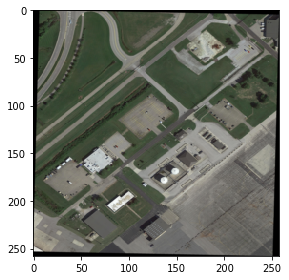

In [8]:
show_tensor_image(batch[0])